# Table of Contents
 <p>

In [15]:
from rmgpy.thermo.wilhoit import Wilhoit
from rmgpy import constants
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
wilhoit = Wilhoit(
            Cp0 = (4.0*constants.R,"J/(mol*K)"),
            CpInf = (21.5*constants.R,"J/(mol*K)"),
            a0 = 0.0977518,
            a1 = -16.3067,
            a2 = 26.2524,
            a3 = -12.6785,
            B = (1068.68,"K"),
            H0 = (-94.088*constants.R,"kJ/mol"),
            S0 = (-118.46*constants.R,"J/(mol*K)"),
            Tmin = (10,"K"),
            Tmax = (3000,"K"),
            comment = 'C2H6',
        )

In [7]:
nasa = wilhoit.toNASA(Tmin=10,Tmax=3000, Tint=1000)

In [8]:
output_error = pd.DataFrame(index = ['cp','h','s'])
Tlist = np.arange(10, 3000, 10)
for T in Tlist:
    differences = {}
    Cp_wilhoit = wilhoit.getHeatCapacity(T)
    Cp_nasa = nasa.getHeatCapacity(T)
    differences['cp'] = (Cp_nasa-Cp_wilhoit) / Cp_wilhoit
    
    H_wilhoit = wilhoit.getEnthalpy(T)
    H_nasa = nasa.getEnthalpy(T)
    differences['h'] = (H_nasa - H_wilhoit) / H_wilhoit
    
    S_wilhoit = wilhoit.getEntropy(T)
    S_nasa = nasa.getEntropy(T)
    differences['s'] = (S_nasa - S_wilhoit) / S_wilhoit
    
    output_error[T] = pd.Series(differences)


In [10]:
output_error

,10,20,30,40,50,60,70,80,90,100,...,2900,2910,2920,2930,2940,2950,2960,2970,2980,2990
cp,0.003102,0.000442,-0.001187,-0.002036,-0.002310,-0.002181,-0.001787,-0.001238,-0.000619,0.000005,...,-0.000104,-0.000178,-0.000258,-0.000344,-0.000436,-0.000534,-0.000639,-7.502750e-04,-0.000868,-0.000993
h,0.000051,0.000045,0.000047,0.000053,0.000062,0.000070,0.000078,0.000084,0.000088,0.000089,...,0.000017,0.000016,0.000015,0.000013,0.000011,0.000008,0.000004,-1.231670e-07,-0.000005,-0.000010
s,-0.000163,0.000192,0.000136,0.000024,-0.000081,-0.000162,-0.000219,-0.000253,-0.000268,-0.000269,...,-0.000029,-0.000029,-0.000029,-0.000030,-0.000030,-0.000031,-0.000031,-3.203994e-05,-0.000033,-0.000034


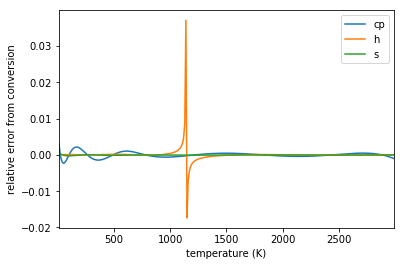

In [16]:
output_error.T.plot()
plt.xlabel('temperature (K)')
plt.ylabel('relative error from conversion')